In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import accuracy_score, auc, plot_roc_curve, plot_precision_recall_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

from utils import *

In [2]:
data = pd.read_csv('train.csv', index_col='id')

In [3]:
X_train, X_validation, y_train, y_validation = train_test_split(
    data.drop('target', axis=1), data.target, test_size=0.2
)

In [4]:
words_transformer = ColumnTransformer(
    [('words', FunctionTransformer(get_words), 'text')]
)

text_pipeline = Pipeline(
    [
        ('word_tokenizer', words_transformer),
        ('stop_words_remover', FunctionTransformer(remove_stop_words)),
        ('cleaned_strings', FunctionTransformer(replace_numbers_and_punctuation)),
        ('count_vectorizer', CountVectorizer(ngram_range=(1, 1))),
        ('tfidf', TfidfTransformer(use_idf=True)),
        ('classifier', MultinomialNB())
    ]
)


In [5]:
param_grid = {
    'tfidf__use_idf': [True, False],
    'count_vectorizer__ngram_range': [(1,1), (1,2), (1,3)],
    'classifier__alpha': [0.1, 0.5, 1.0, 1.2, 1.5]
}

grid_search = GridSearchCV(text_pipeline, param_grid=param_grid)
grid_search.fit(X_train, y_train)
accuracy_score(grid_search.predict(X_validation), y_validation)

0.7984241628365069

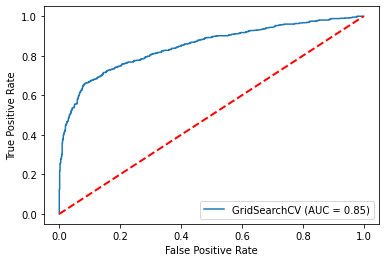

In [6]:
plot_roc_curve(grid_search, X_validation, y_validation)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.show()

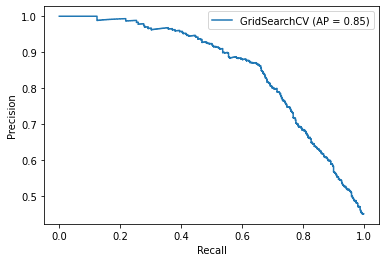

In [7]:
plot_precision_recall_curve(grid_search, X_validation, y_validation)
plt.legend(loc='upper right')
plt.show()